In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../imports/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


## Panel G <br>
Data requirements: patient mutation matrix, all tcga affinity data frame, cancer gene lists

In [2]:
specific_scores = pd.read_csv(PATH_TO_DATA + 'data/patient_specific_scores.PHBR.csv', index_col=0)
patient_mutations = pd.read_csv(PATH_TO_DATA + 'data/patient_mutations.cancer.PHBR.csv', index_col=0)
cancer_genes = [x.strip() for x in open(PATH_TO_DATA + 'data/tumor_suppressor_genes.txt')] + [x.strip() for x in open('/cellar/users/ramarty/Data/hla/git_data/data/onco_genes.txt')]

In [3]:
driver_mutations = list(patient_mutations.sum()[patient_mutations.sum() > 10].index)

In [4]:
def get_gene(x):
    return x.split('_')[0]
specific_scores['gene'] = specific_scores.mutation.apply(get_gene)

In [5]:
# number of driver mutations
len(specific_scores[specific_scores.mutation.isin(driver_mutations)].mutation.value_counts())

144

In [6]:
# N for both groups
len(specific_scores[specific_scores.mutation.isin(driver_mutations)].score), len(specific_scores[~specific_scores.gene.isin(cancer_genes)].score)

(5191, 1584367)

In [7]:
sp.ttest_ind(specific_scores[specific_scores.mutation.isin(driver_mutations)].score, specific_scores[~specific_scores.gene.isin(cancer_genes)].score)

Ttest_indResult(statistic=7.5529200970418922, pvalue=4.258315956370786e-14)

In [8]:
plotting_df = pd.DataFrame({'Mutation': ['Passenger' for x in specific_scores[~specific_scores.gene.isin(cancer_genes)].score] + ['Driver' for x in specific_scores[specific_scores.mutation.isin(driver_mutations)].score],
             'Score': list(specific_scores[~specific_scores.gene.isin(cancer_genes)].score) + list(specific_scores[specific_scores.mutation.isin(driver_mutations)].score)})

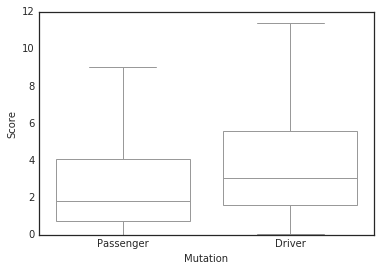

In [9]:
sns.boxplot(x='Mutation', y='Score', data=plotting_df, showfliers=False, color='white')
plt.savefig(PATH_TO_GENERATED_FIGURES + 'passenger.pdf')